# GBM_SEEP

## Step I: Importing the datasets

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import lightgbm as lgb

#import the global dataset
dataset = pd.read_csv('globalbrgdgtlabel.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

#import the dataset for prediction
dataset2 = pd.read_csv('template.csv')
X_template = dataset2.iloc[:, :-1].values
depth_template = dataset2.iloc[:, -1].values

## Step II: Splitting the dataset and train the data

[[117   0   0]
 [  0   5   0]
 [  2   0  60]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       117
           1       1.00      1.00      1.00         5
           2       1.00      0.97      0.98        62

    accuracy                           0.99       184
   macro avg       0.99      0.99      0.99       184
weighted avg       0.99      0.99      0.99       184

Accuracy: 99.60 %
Standard Deviation: 0.66 %


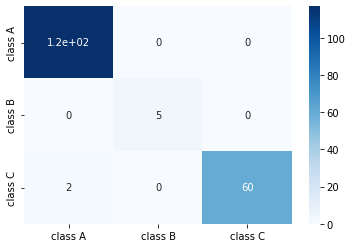

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE(random_state=11)
X_train, y_train = oversample.fit_resample(X_train, y_train)

# train the data by LightGBM
from lightgbm import LGBMClassifier
GBM_SEEP = LGBMClassifier()
GBM_SEEP.fit(X_train, y_train)

# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = GBM_SEEP.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

from string import ascii_uppercase
from pandas import DataFrame
import numpy as np
import seaborn as sn
from sklearn.metrics import confusion_matrix

columns = ['class %s' %(i) for i in list(ascii_uppercase)[0:len(np.unique(y_test))]]

confm = confusion_matrix(y_test, y_pred)
df_cm = DataFrame(confm, index=columns, columns=columns)

ax = sn.heatmap(df_cm, cmap='Blues', annot=True)


# k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = GBM_SEEP, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


# Step III: Prediction

In [23]:
y_predtemplate = GBM_SEEP.predict(X_template)
dct=GBM_SEEP.predict_proba(X_template)
df2 = pd.DataFrame(dct) 
df2.to_csv('probability.csv')

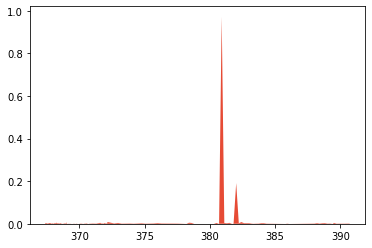

In [24]:
#seep-type probability
plt.stackplot(depth_template,df2[1],colors =['#E64B35FF'])
plt.savefig("seep.pdf", format='pdf', dpi=1000, bbox_inches='tight')

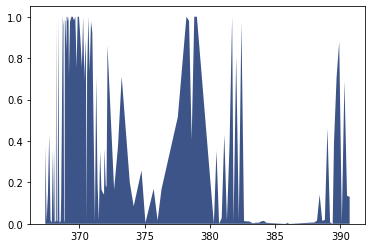

In [25]:
#marine-type probability
plt.stackplot(depth_template,df2[0],colors =['#3C5488FF'])
plt.savefig("marine.pdf", format='pdf', dpi=1000, bbox_inches='tight')

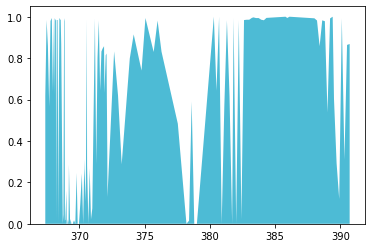

In [26]:
#soil-type probability
plt.stackplot(depth_template,df2[2],colors =['#4DBBD5FF'])
plt.savefig("soil.pdf", format='pdf', dpi=1000, bbox_inches='tight')